In [1]:
# Wrangling
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Cluster
from sklearn.cluster import KMeans

np.warnings.filterwarnings('ignore')

# Table of Contents

1. [Introduction](#1.-Introduction)

    1.1. [Objectives](#1.1-Objectives)
    
2. [Data Loading, Data Cleaning and Descriptive Analysis](#2.-Data-Loading,-Data-Cleaning-and-Descriptive-Analysis)

    2.1. [Data Cleaning](#2.1.-Data-Cleaning)
    
    2.2. [Merge](#2.2.-Merge)
    
    2.3. [Descriptive Analysis](#2.3.-Descriptive-Analysis)
    
3. [Data Analysis](#3.-Data-Analysis)

    3.1. [What regions have most of its population vaccinated?](#3.1.-What-regions-have-most-of-its-population-vaccinated?)
    
    3.2. [Does a higher GDP mean a higher vaccinated population?](#3.2.-Does-a-higher-GDP-mean-a-higher-vaccinated-population?)
    
    3.3. [What makes Urugay and Saudi Arabia special?](#3.3-What-makes-Urugay-and-Saudi-Arabia-special?)
    
    3.4. [Does Social support and Healthy life expectany influence % of vaccinated people?](#3.4.-Does-Social-support-and-Healthy-life-expectany-influence-%-of-vaccinated-people?)
    
    3.5. [Is a vaccinated country a happy one?](#3.5.-Is-a-vaccinated-country-a-happy-one?)

4. [Conclusions](#4.-Conclusions)

5. [Recommendations](#5.-Recommendations)

# 1. Introduction

Following the outbreak of the Covid-19 and the following development of the vaccine, the world now faces the challenge of distributing the vaccine all around the world with the hope of returning back to the now acclaimed 'normality'. The progress seems positive at a first glance. But, with the limited amount of vaccines, the problem now seems to distribute the vaccine in a fair manner, allowing the less wealthy countries to have access to the vaccine.

This notebook analyses the data of latest Covid-19 Vaccine Status of all the Countries in the World as on 30 June, 2021 (https://www.kaggle.com/anandhuh/latest-worldwide-vaccine-data) and compares it with the data of the world happiness report (https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021). 

What story is behind the data? Is the world succeding in distributing the vaccine in a fair manner? Is a happy country also a vaccinated one? We will find out.

## 1.1. Objectives

The notebook will focus mainly on what factors make a country more vaccinated than other.

- Find key aspects of a leading vaccinated country
- Develop strategies and reccomendations based on findings
- Build a model that predicts how vaccinated a country is as on 30 June, 2021

# 2. Data Loading, Data Cleaning and Descriptive Analysis

In [2]:
covid = pd.read_csv('../input/latest-worldwide-vaccine-data/Worldwide Vaccine Data.csv')
happiness = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report-2021.csv')

## 2.1. Data Cleaning
Let's start by cleaning the data of both datasets. We will see if they have missing values, duplicates and see if eliminate them if thats the case.

Very important to take into account that both datasets are going to merge. Therefore, they must have one key column that has the same values. Hence, We will also see if the values are consistent in both datasets.

### 2.1.1. Covid

There aren't any duplicates


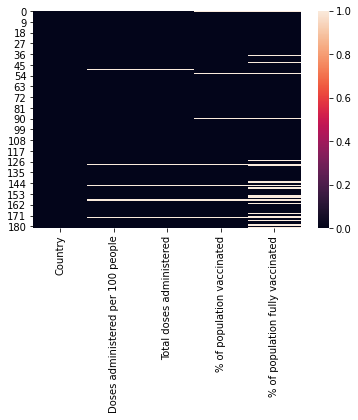

In [3]:
# Duplicates check

if covid.duplicated().any() == False:
    print("There aren't any duplicates")
else:
    print('There are suplicates')
    
sns.heatmap(covid.isnull())
plt.show()

There are some null values, most of them in the '% of population fully vaccinated'. let's check thos nulls.

In [4]:
covid[covid['% of population fully vaccinated'].isnull()]

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,U.A.E.,156.0,15198661.0,NaN,NaN
37,Kuwait,74.0,3100000.0,68.0,NaN
43,Bhutan,64.0,484751.0,64.0,NaN
52,Saudi Arabia,52.0,17671943.0,NaN,NaN
90,Saint Vincent and the Grenadines,22.0,24667.0,NaN,NaN
125,Algeria,5.8,2500000.0,5.8,NaN
128,Myanmar,NaN,NaN,NaN,NaN
129,Libya,5.5,370066.0,5.5,NaN
143,Ivory Coast,2.9,749368.0,2.9,NaN
146,Nicaragua,NaN,NaN,NaN,NaN


The fact that there are contries which don't have fully vaccunated people is controversial, but consistent. At a first glimpse, we can see that most of those countries are in Africa. 

We are going to replace those Null's with 0's.

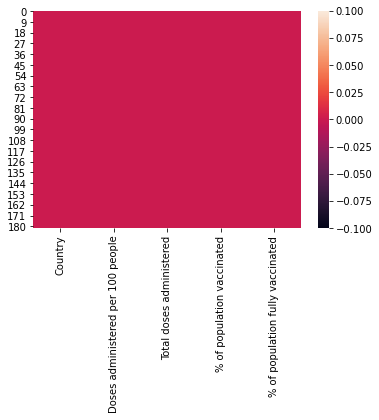

In [5]:
covid.fillna(0, inplace = True)

sns.heatmap(covid.isnull())
plt.show()

### 2.1.2. Happiness

There aren't any duplicates


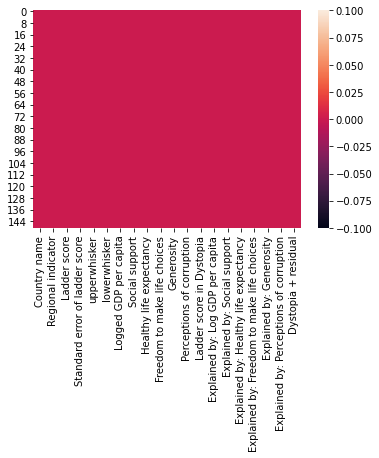

In [6]:
# Duplicates check
if happiness.duplicated().any() == False:
    print("There aren't any duplicates")
else:
    print('There are suplicates')

# Nulls check
sns.heatmap(happiness.isnull())
plt.show()

all good with the happiness dataset. Let's proceed and merge both datasets

## 2.2. Merge
The countries will be our key column, so let's start checking the names of the countries. There are a lot of countries, but is still possible to check at a glance if there are similarities between both dataset, so that's what we are going to see.

In [7]:
print(covid.sort_values(by=["Country"])["Country"].values, '\n', len(covid.sort_values(by=["Country"])["Country"]))

print(happiness.sort_values(by=['Country name'])['Country name'].values, '\n', len(happiness.sort_values(by=['Country name'])['Country name']))



['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominican Rep.' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Liby

Most of the values are consistent, but the following points should be mention.
- The happiness dataset has less countries than the covid dataset. An inner join will be used but information will be lost. The information lost will be around 30 rows, but it shouldn't be critical for the analysis
- United kingodm has different names. It will be changed manually since is an important region.

In [8]:
display(covid[covid['Country']=='U.K.'])
covid.loc[6,'Country'] = 'United Kingdom'

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
6,U.K.,116.0,77303533.0,67.0,49.0


Let's proceed with the merge

In [9]:
df = covid.merge(happiness, left_on='Country', right_on='Country name', how='inner')
del df['Country name']

df = df.sort_values(by=['Country'])
df

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
114,Afghanistan,2.2,835694.0,1.7,0.5,South Asia,2.523,0.038,2.596,2.449,...,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
58,Albania,33.0,943439.0,19.0,14.0,Central and Eastern Europe,5.117,0.059,5.234,5.001,...,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
93,Algeria,5.8,2500000.0,5.8,0.0,Middle East and North Africa,4.887,0.053,4.991,4.783,...,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
48,Argentina,45.0,20221697.0,36.0,8.9,Latin America and Caribbean,5.929,0.056,6.040,5.819,...,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
115,Armenia,2.2,64293.0,1.8,0.4,Commonwealth of Independent States,5.283,0.058,5.397,5.168,...,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Venezuela,5.1,1466988.0,4.3,0.8,Latin America and Caribbean,4.892,0.064,5.017,4.767,...,-0.169,0.827,2.43,0.852,0.897,0.574,0.284,0.078,0.072,2.135
106,Vietnam,3.7,3593970.0,3.5,0.2,Southeast Asia,5.411,0.039,5.488,5.334,...,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
127,Yemen,0.9,268753.0,0.9,0.0,Middle East and North Africa,3.658,0.070,3.794,3.521,...,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
129,Zambia,0.8,151205.0,0.8,0.1,Sub-Saharan Africa,4.073,0.069,4.209,3.938,...,0.061,0.823,2.43,0.528,0.552,0.231,0.487,0.227,0.074,1.975


We ended up with 136 countries and lot's of useful data for our analysis. Let's now proceed with the descriptive analysis

## 2.3. Descriptive Analysis

Since we have 24 features, we will first start selecting the variables that we are going to use. The correlation matrix will help us find the the most relevant features. I will also select some variables that i find interesting for the analysis. Important to remark that the cosen criteria of the variables will be the relationship they have with the feature'% of population vaccinated', since our analysis is based on that.

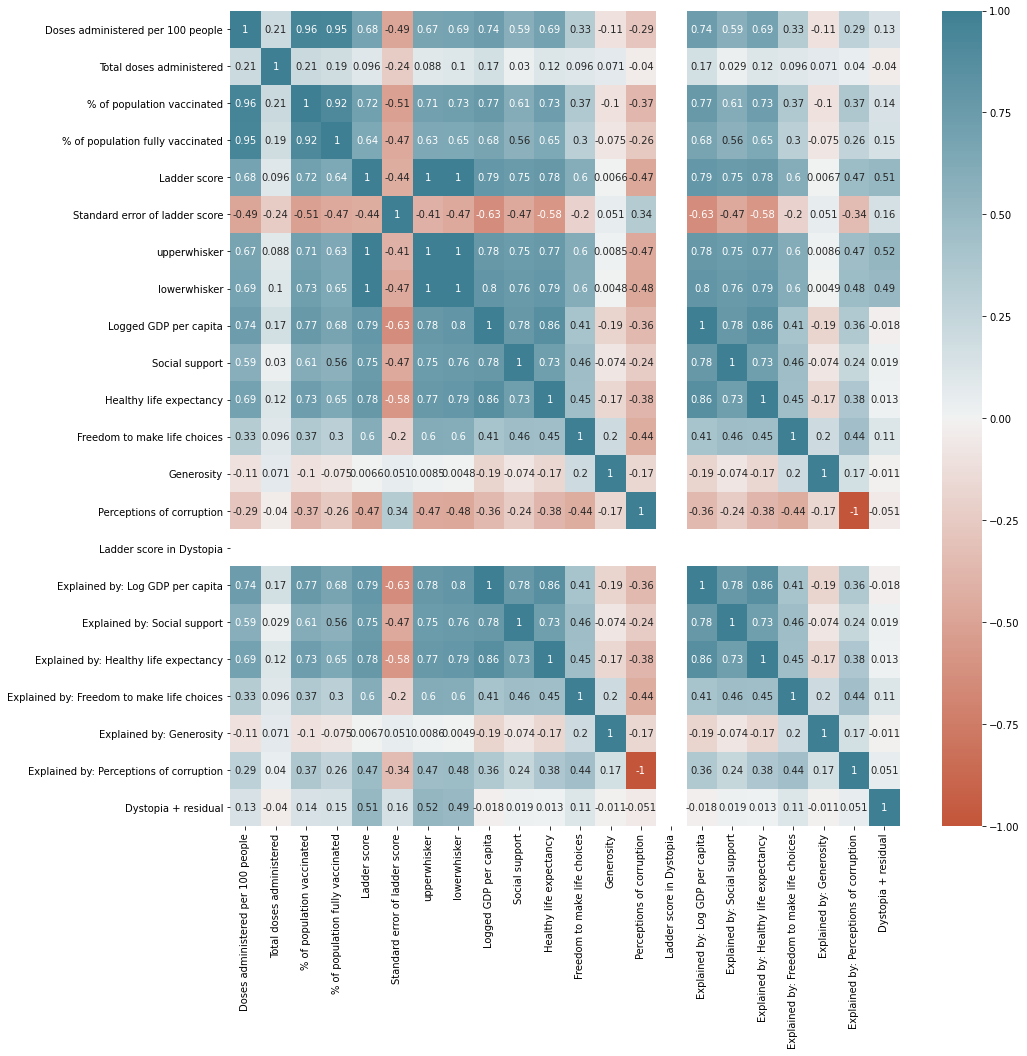

In [10]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

plt.show()

In [11]:
# the chosen features are the wollowing
features = ['Country','Regional indicator', '% of population vaccinated', '% of population fully vaccinated', 
            'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']

The features that start with "Explained by:" wont be selected since those are the rank of the country based on features of the same dataset. In other words, is redundant data.

In [12]:
df = df[features]
df

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
114,Afghanistan,South Asia,1.7,0.5,2.523,7.695,0.463,52.493
58,Albania,Central and Eastern Europe,19.0,14.0,5.117,9.520,0.697,68.999
93,Algeria,Middle East and North Africa,5.8,0.0,4.887,9.342,0.802,66.005
48,Argentina,Latin America and Caribbean,36.0,8.9,5.929,9.962,0.898,69.000
115,Armenia,Commonwealth of Independent States,1.8,0.4,5.283,9.487,0.799,67.055
...,...,...,...,...,...,...,...,...
98,Venezuela,Latin America and Caribbean,4.3,0.8,4.892,9.073,0.861,66.700
106,Vietnam,Southeast Asia,3.5,0.2,5.411,8.973,0.850,68.034
127,Yemen,Middle East and North Africa,0.9,0.0,3.658,7.578,0.832,57.122
129,Zambia,Sub-Saharan Africa,0.8,0.1,4.073,8.145,0.708,55.809


In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 114 to 84
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           136 non-null    object 
 1   Regional indicator                136 non-null    object 
 2   % of population vaccinated        136 non-null    float64
 3   % of population fully vaccinated  136 non-null    float64
 4   Ladder score                      136 non-null    float64
 5   Logged GDP per capita             136 non-null    float64
 6   Social support                    136 non-null    float64
 7   Healthy life expectancy           136 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.6+ KB


None

With 2 categorical variables and 6 floats, we can start doing the descriptive analysis.

### 2.3.1. Category features

We know that each country is unique, so we only have one categorical variable to examine.

In [14]:
df[list(df.select_dtypes('object').columns)]

,Country,Regional indicator
114,Afghanistan,South Asia
58,Albania,Central and Eastern Europe
93,Algeria,Middle East and North Africa
48,Argentina,Latin America and Caribbean
115,Armenia,Commonwealth of Independent States
...,...,...
98,Venezuela,Latin America and Caribbean
106,Vietnam,Southeast Asia
127,Yemen,Middle East and North Africa
129,Zambia,Sub-Saharan Africa


In [15]:
fig = px.histogram(df, x='Regional indicator', template="plotly_white", color_discrete_sequence=["rgb(127,232,186)"]).update_xaxes(categoryorder="total descending")
fig.show()

print(df['Regional indicator'].value_counts())

Sub-Saharan Africa                    32
Western Europe                        20
Latin America and Caribbean           18
Central and Eastern Europe            16
Middle East and North Africa          15
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
North America and ANZ                  4
East Asia                              3
Name: Regional indicator, dtype: int64


### 2.3.2. Number Features

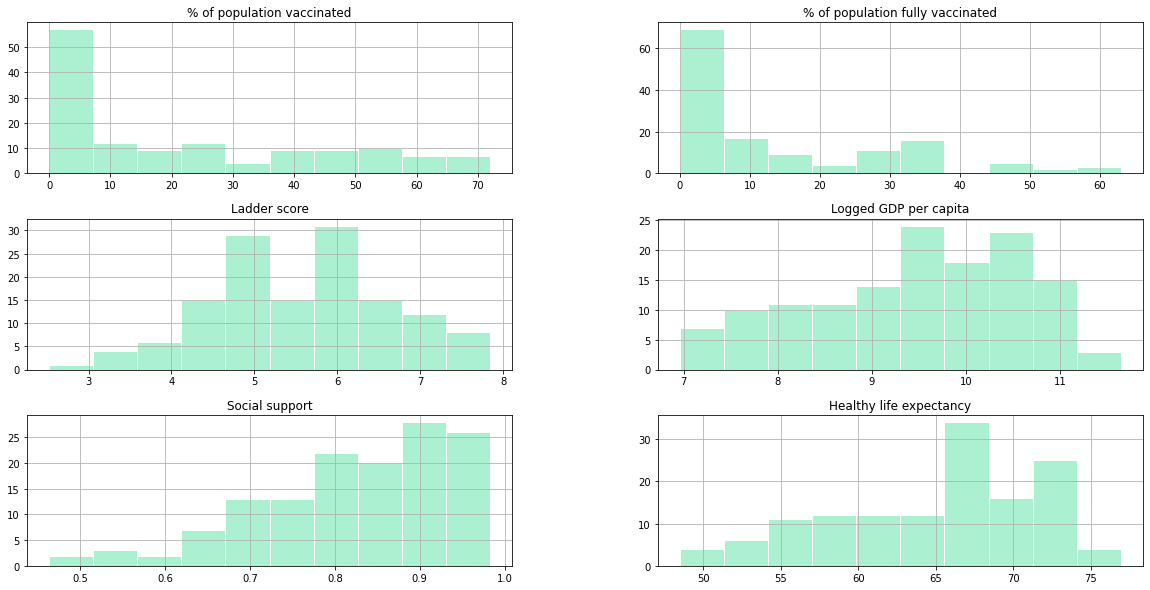

,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,22.655147,14.050735,5.572051,9.451610,0.820221,65.135037
std,22.381731,16.468736,1.070098,1.132061,0.112610,6.650741
min,0.000000,0.000000,2.523000,6.958000,0.463000,48.478000
25%,3.150000,0.675000,4.869750,8.548750,0.750000,60.427750
50%,14.000000,6.000000,5.617000,9.573000,0.839500,66.700500
75%,41.250000,28.250000,6.268500,10.391750,0.910750,69.664500
max,72.000000,63.000000,7.842000,11.647000,0.983000,76.953000


In [16]:
numbers = list(df.select_dtypes('float64').columns)

df[numbers].hist(figsize=(20,10), color='#aaf0d1', edgecolor='white')

plt.show()

df[numbers].describe()

All the numerical variables have an almost normal shape, except for '% of population vaccinated' and '% of population fully vaccinated', which have most of the values in the lower bins. This is a first insight that tells us that most of the countries are still on the first phase with around 14% (median) of the population vaccinated.

Let's start analysing the data.

# 3. Data Analysis

## 3.1. What regions have most of its population vaccinated?

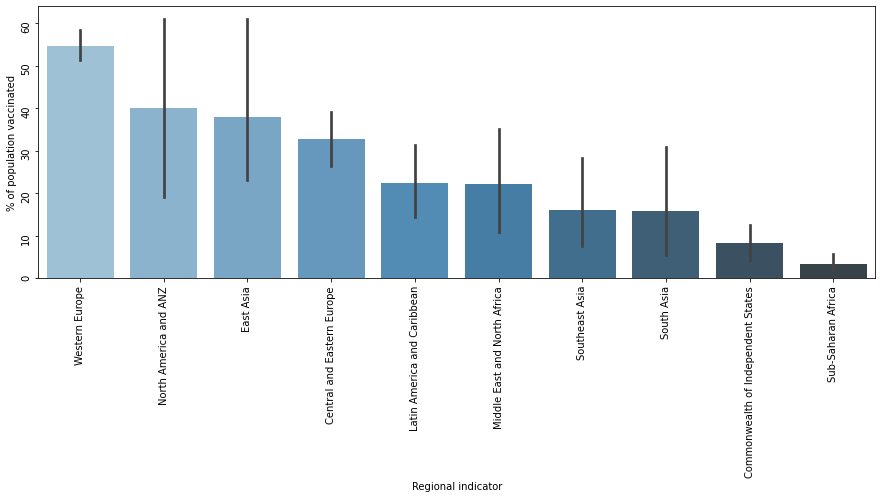

Regional indicator
Western Europe                        54.600000
North America and ANZ                 40.000000
East Asia                             38.000000
Central and Eastern Europe            32.693750
Latin America and Caribbean           22.283333
Middle East and North Africa          22.060000
Southeast Asia                        15.922222
South Asia                            15.914286
Commonwealth of Independent States     8.333333
Sub-Saharan Africa                     3.290625
Name: % of population vaccinated, dtype: float64


In [17]:
fig, ax = plt.subplots(figsize=(15,5))

order=list(df.groupby('Regional indicator')['% of population vaccinated'].mean().sort_values(ascending=False).index)
sns.barplot(x='Regional indicator', y='% of population vaccinated', data=df, order=order, palette="Blues_d")

ax.tick_params(labelrotation=90)

plt.show()

print(df.groupby('Regional indicator')['% of population vaccinated'].mean().sort_values(ascending=False))

the lines on top of the bars represent the variance of the mean, which is represented by the height of the bar. We can start seeing that Western Europe, North America and ANZ, and East Asia lead the vaccunation process. South Asia and Sub-Saharan Africa sit at the bottom. 

Important to remark the high variance in each region except for western Europe. This means that there are some countries in the sample that have way more vaccinated people than other. Could this be a sign of regional cooperation between the countries? My intuition tells me yes. The european union and the european comission should have developed a plan around the continent, that would explain the low variance. 

North America and ANZ on the other hand, doesn't seem to be cooperating. United States and Canada have more thant 50% of its opulation vaccinated, whereas Australia and New Zealand have 24% and 14% respectively as shown in the table below.

In [18]:
df[df['Regional indicator']=='North America and ANZ']

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
59,Australia,North America and ANZ,24.0,5.8,7.183,10.796,0.940,73.9
10,Canada,North America and ANZ,68.0,30.0,7.103,10.776,0.926,73.8
68,New Zealand,North America and ANZ,14.0,9.0,7.277,10.643,0.948,73.4
9,United States,North America and ANZ,54.0,46.0,6.951,11.023,0.920,68.2


## 3.2. Does a higher GDP mean a higher vaccinated population?

Here we are going to do a scatterplot of the % of people vaccinated vs the GDP per Capita. We are also going to use the kmeans algorithm to set 3 clusters representing the level of GDP they belong to, to make the interpretation easier.

In [19]:
# Cluster
X = df.loc[:,'Logged GDP per capita'].values.reshape(-1,1)

kmeans = KMeans(n_clusters=3, n_init = 3, init = "random", random_state = 42)
kmeans.fit(X)

df['GDP_Cluster'] = kmeans.labels_
df['GDP_Cluster'] = df['GDP_Cluster'].astype(str)
df['GDP_Cluster']

Mmap = {'0': 'Low GDP', '1':'Medium GDP', '2':'High GDP'}
df['GDP_Cluster'] = df['GDP_Cluster'].map(Mmap)


# Viz
fig = px.scatter(data_frame=df,
    x='Logged GDP per capita',
    y='% of population vaccinated',
    color='GDP_Cluster',
    template="plotly_white",
    hover_name='Country',
    hover_data=['Regional indicator', '% of population vaccinated', 'Logged GDP per capita', 'Social support'])

fig.show()

gdp = df.groupby('GDP_Cluster')['% of population vaccinated'].mean().sort_values()
gdp = pd.DataFrame(gdp)
gdp = gdp.rename(columns={'% of population vaccinated': 'average % of population vaccinated'})
display(gdp)

,average % of population vaccinated
GDP_Cluster,
Low GDP,2.726316
Medium GDP,16.401961
High GDP,45.553191


We can see from the graph that GDP does influence the percentage of population vaccinated: the higher the GDP, the higher the people vaccinated.

If we explore through the graph, we notice that there is one high GDP country with low vaccinated population (Saudi Arabia), and medium GDPs countries with high vaccinated population (Mongolia, Maldives and Uruguay). This Phenomenon could be because two reasons:

1. An outsanding/poor management of agreements with the labs
2. A low/high level of cooperation between countries of a region (as seen in section 3.1)

## 3.3 What makes Urugay and Saudi Arabia special?

From the graph above, we notice that saudi arabia has a low percentage of people vaccinated and a high GDP. On the other hand, Urugay is a medium GDP country but have a high % of vaccinated people. So what makes these countries special?

To answer this question, we are going to calculate the data of high income countries and compare it with Uruguay and Saudi Arabia. We are also going to compare the data of these two countries with the data of the countries in their region.

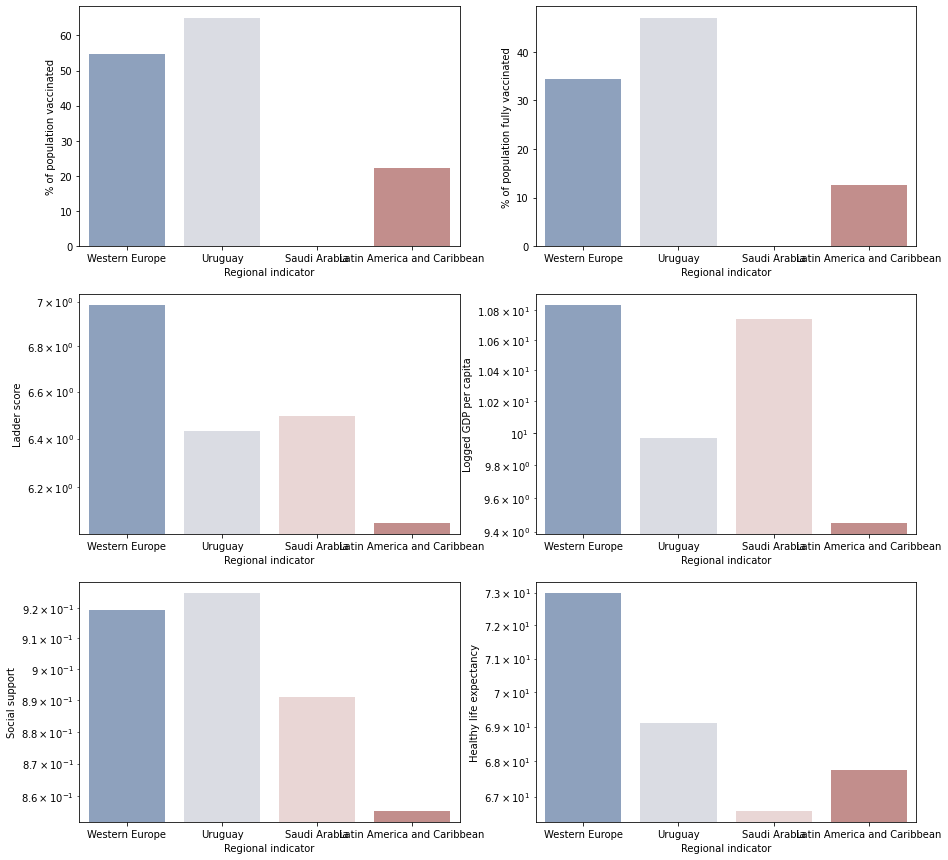

,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
0,Western Europe,54.600000,34.400000,6.983850,10.835050,0.919200,72.989850
6,Uruguay,65.000000,47.000000,6.431000,9.966000,0.925000,69.100000
43,Saudi Arabia,0.000000,0.000000,6.494000,10.743000,0.891000,66.603000
0,Latin America and Caribbean,22.283333,12.516667,6.055611,9.451167,0.855389,67.762167


In [20]:
europe = df['Regional indicator'] == "Western Europe"
europe2 = df[europe]
europe2 = europe2.groupby('Regional indicator')[list(europe2.keys()[2:-1])].mean().reset_index()

latin = df['Regional indicator'] == "Latin America and Caribbean"
latin2 = df[latin]
latin2 = latin2.groupby('Regional indicator')[list(latin2.keys()[2:-1])].mean().reset_index()

uruguay = df['Country'] == "Uruguay"
uruguay = df['Country'] == "Uruguay"
uruguay2 = df[uruguay]
del uruguay2['Regional indicator']
uruguay2 = uruguay2.rename(columns={'Country':'Regional indicator'})
uruguay2 = uruguay2.iloc[:,:-1]

saudi = df['Country'] == "Saudi Arabia"
saudi2 = df[saudi]
del saudi2['Regional indicator']
saudi2 = saudi2.rename(columns={'Country':'Regional indicator'})
saudi2 = saudi2.iloc[:,:-1]

special = pd.concat([europe2, uruguay2, saudi2, latin2], axis= 0)

fig, ax = plt.subplots(3,2, figsize=(15,15))

sns.barplot(x='Regional indicator', y='% of population vaccinated', data=special, ax=ax[0,0], palette="vlag")
sns.barplot(x='Regional indicator', y='% of population fully vaccinated', data=special, ax=ax[0,1], palette="vlag")
sns.barplot(x='Regional indicator', y='Ladder score', data=special, ax=ax[1,0], palette="vlag")
ax[1,0].set_yscale("log")
sns.barplot(x='Regional indicator', y='Logged GDP per capita', data=special, ax=ax[1,1], palette="vlag")
ax[1,1].set_yscale("log")
sns.barplot(x='Regional indicator', y='Social support', data=special, ax=ax[2,0], palette="vlag")
ax[2,0].set_yscale("log")
sns.barplot(x='Regional indicator', y='Healthy life expectancy', data=special, ax=ax[2,1], palette="vlag")
ax[2,1].set_yscale("log")


plt.show()
display(special)

**Uruguay**
We can tell from the graphs and table that Uruguay is doing well in th evaccination process, even better than the average of Western Europe and way more than the its region, Latin America and the caribbean. Important to remark that Uruguay dont have a higher GDP than the average of Western Union. But, if we keep examining the graphs, we see that Uruguay has an outstanding social suuport. A couple of hypothesis then come to my mind.

- Is Uruguay doing better than europe and latin america because the importance they put on social support?
- Is Western Union doing worst because they level of cooperation en distribution? this could also explain why Uruguay is so far from the latin america average, since the level of cooperation in this region is quite low.

**Saudi Arabia**
Saudi Arabia is more of a special case than Uruguay. The contry has decent numbers in all of its indicadors. But, they still don't have any vaccinated person. 

To answer this question i had to further research in the internet and found that Saudi Arabia has over 53% of its population vaccinated. Hence, the data of Saudi Arabia is not accurate in the dataset and should be discarted.

## 3.4. Does Social support and Healthy life expectany influence % of vaccinated people?

In this section we are going to use a scatter plot again. But, since we have three variables, we are not going to cluster them but use the parameters "size" and "hue" to graph the three of them.

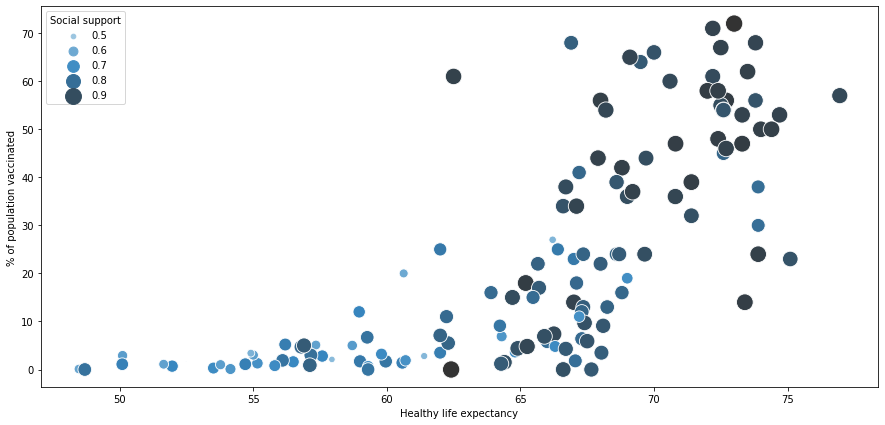

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(x='Healthy life expectancy', y='% of population vaccinated', data=df, 
                hue='Social support',palette="Blues_d", 
                size='Social support', sizes=(0.3, 300))

plt.show()

The graph tells us that there is indeed a positive relationship between the % of vaccinated people, healthy life expectancy and social support.

## 3.5. Is a vaccinated country a happy one?

To answer this question we are goin to use the ladder score. The higher the ladder score, the happier a country is.

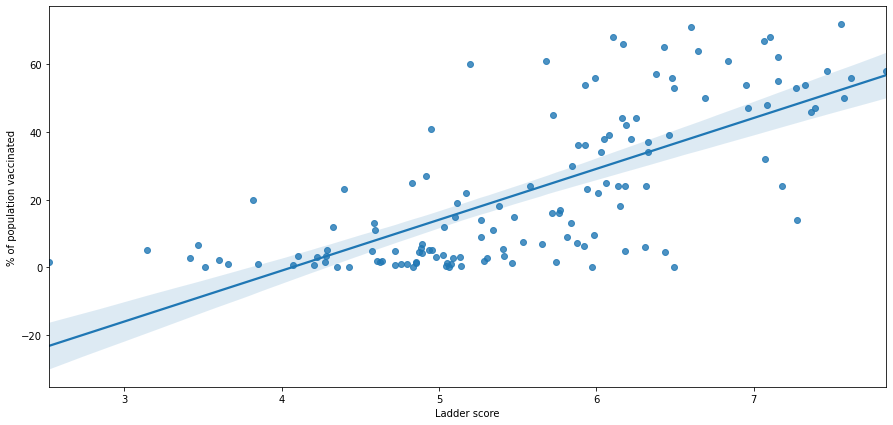

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
sns.regplot(x="Ladder score", y="% of population vaccinated", data=df)

plt.show()

There is indeed a trend that shows that the higher a country is in the happines report ladder, the more people will be vaccinated. Important to remark that countries achieve this level of happiness due to a combination of economic factors, some analyze before and other deleted to focus the analysis. This is a clear example of correlation doesn't mean causation. But, that doesn't take out the fact that a happy country is a vaccinated one.

# 4. Conclusions
- Countries in their regions are in different vaccination stage, which means that there's no evidence of cooperation between countries in their regions, this phenomenon is explained with the variance of the mean in seciton 3.1. Thats not the case for Western Europe, where the countries have a similar % of vaccinated population.

- The trend in section 3.2. shows that the % of vaccinated population is directly related to the GDP of a country: the higher the GDP the higher the % of vaccinated population. This is not the case of Chile, since they are a medium level GDP but have a higher % of vaccinated population. This could be explained with the emphasis the country have on social support, factor that is higher than almost all of the high GDP countries.

- A happy country is a vaccinated one. But do not rush with a direct causation. A happy country is the result of a combination of economic and social factors that usually make a developed country. Then, i would rather say that a developed country is a vaccinated one.

# 5. Recommendations

- What is seen as a competition of what country has the highest vaccinated population should be seen as the region who is distributing its resources the best and even helping poor countries. For the analysis we see how Uruguay is way more advanced than the countries in its region and this is a sign of poor regional coordination. The job of Uruguay has been outsanding, but the coopeartion problem in the region is evident and transcends to other areas. It is then reccomended to better the relationships in each region for a better distribution and further cooperation in other areas.

- The role of social support in Uruguay is also evident and the data back up its results with the level of vaccinated population. A country that cares about its people will also provide them. The reccomendation is to invest in entities and programs than promotes social support